In [1]:
using DelimitedFiles, HDF5, FileIO
using Plots, Rsvg, LaTeXStrings, StatPlots
using Chemfiles, JUMD
using LinearAlgebra, Statistics
home = "/home/pbarletta/labo/18/lbp/run"
rtdos = "/home/pbarletta/labo/18/lbp/rtdos_log"
pyplot()

┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1189
┌ Info: Recompiling stale cache file /home/pbarletta/.julia/compiled/v1.0/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/pbarletta/.julia/compiled/v1.0/IterableTables/727hO.ji for IterableTables [1c8ee90f-4401-5389-894e-7a04a3dc0f4d]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/pbarletta/.julia/compiled/v1.0/Widgets/F5dj0.ji for Widgets [cc8bc4a8-27d6-5769-a93b-9d913e69aa62]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/pbarletta/.julia/compiled/v1.0/Clustering/Ovl2Q.ji for Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/pbarletta/.julia/compiled/v1.0/KernelDensity/4QyGx.ji for KernelDensity [5ab0869b-81aa-558d-bb23-cbf5423bbe9b]
└ @ Base loading.jl:1187


Plots.PyPlotBackend()

### Lee modos, volumen original y  volúmenes NDD. Obtiene VGV

In [94]:
pdb = "1ifb"
# Leo modos
modes_1ifb, evals_1ifb = JUMD.readPtrajModes(
    joinpath(home, pdb,  "pca", string("modes_", pdb)))

# AAs
aa3 = convert(Int64, length(evals_1ifb))
aa = convert(Int64, aa3 / 3)

# Leo volumen de la traj
trj_vol = convert(Array{Float64, 1}, 
    readdlm(joinpath(home, pdb, "cavidad", string("vol_trj_", pdb)))[:, 3]);

# Leo volúmene del average
vol_avg_1ifb = convert(Float64, readdlm(joinpath(home, pdb,  "ndd", string("vol_avg_", pdb)))[3])

# Leo volúmenes NDD
ndd_out_1ifb = convert(Array{Float64, 1},
    readdlm(joinpath(home, pdb,  "ndd", string("out_ndd_", pdb)))[2:end, 2])

# VGV
vgv_1ifb = (ndd_out_1ifb .- vol_avg_1ifb) .* evals_1ifb
vgv_1ifb = vgv_1ifb ./ norm(vgv_1ifb);

### Obtengo proyecciones de PCA sobre trayectoria

In [5]:
dif = h5read(joinpath(rtdos, string("diff_", pdb, ".h5")), "dif")
norm_dif = mapslices(x -> x ./ norm(x), dif,  dims = 1)
nframes = size(dif)[2]

prj_1_1ifb = Array{Float64, 1}(undef, nframes)
prj_2_1ifb = Array{Float64, 1}(undef, nframes)
prj_3_1ifb = Array{Float64, 1}(undef, nframes)

for i = 1:nframes
    prj_1_1ifb[i] = dot(norm_dif[:, i], modes_1ifb[:, 1])
    prj_2_1ifb[i] = dot(norm_dif[:, i], modes_1ifb[:, 2])
    prj_3_1ifb[i] = dot(norm_dif[:, i], modes_1ifb[:, 3])
end

# Smooth
smooth_prj_1_1ifb = [ mean(prj_1_1ifb[i:i+9]) for i = 1:10:length(prj_1_1ifb)-9 ]
smooth_prj_2_1ifb = [ mean(prj_2_1ifb[i:i+9]) for i = 1:10:length(prj_2_1ifb)-9 ]
smooth_prj_3_1ifb = [ mean(prj_3_1ifb[i:i+9]) for i = 1:10:length(prj_3_1ifb)-9 ];

# Energía de poblaciones

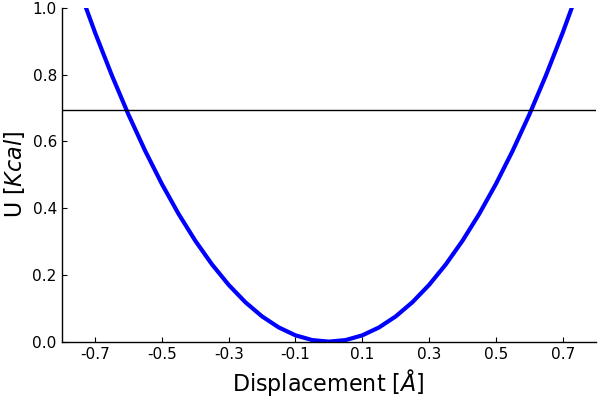

In [95]:
pasos = collect(-.8:.05:.8)
npasos = length(pasos)
RT = 0.693

E_1ifb = Array{Float64,1}(undef, npasos)
[ E_1ifb[i] = JUMD.energiaGdte(evals_1ifb, vgv_1ifb, pasos[i]) for i in 1:npasos]

plt_u = plot(pasos, E_1ifb,
    xticks = -.7:.2:.7, yticks = 0:.2:1.,   
    xlims = (-.8, .8), ylims = (0, 1.),
    guidefont = font(16, "Helvetica"), tickfont = font(11, "Helvetica"),
    yaxis = L"U $[Kcal]$", xaxis = L"Displacement $[\AA]$ ",
    linecolor = Colors.colorant"#0000FF", linewidth = 3,
    legend = false, grid = false)
hline!([RT], linecolor = Colors.colorant"black")

In [92]:
# Leo modos
modes_1, evals_1 = JUMD.readPtrajModes(joinpath(home, pdb, "poblaciones",
        "pca", "1", string("1", "vol_modes_", pdb)))
modes_2, evals_2 = JUMD.readPtrajModes(joinpath(home, pdb, "poblaciones",
        "pca", "2", string("2", "vol_modes_", pdb)))
modes_3, evals_3 = JUMD.readPtrajModes(joinpath(home, pdb, "poblaciones",
        "pca", "3", string("3", "vol_modes_", pdb)))
modes_4, evals_4 = JUMD.readPtrajModes(joinpath(home, pdb, "poblaciones",
        "pca", "4", string("4", "vol_modes_", pdb)))

# Leo volúmenes originales
vol_avg_1 = convert(Float64, readdlm(joinpath(home, pdb, "poblaciones",
            "ndd", "1", string("vol_avg_", pdb)))[3])
vol_avg_2 = convert(Float64, readdlm(joinpath(home, pdb, "poblaciones",
            "ndd", "2", string("vol_avg_", pdb)))[3])
vol_avg_3 = convert(Float64, readdlm(joinpath(home, pdb, "poblaciones",
            "ndd", "3", string("vol_avg_", pdb)))[3])
vol_avg_4 = convert(Float64, readdlm(joinpath(home, pdb, "poblaciones",
            "ndd", "4", string("vol_avg_", pdb)))[3])

# Leo volúmenes NDD
ndd_out_1 = convert(Array{Float64, 1},
    readdlm(joinpath(home, pdb, "poblaciones", "ndd", "1", string("out_ndd_", pdb)))[2:end, 2])
# VGV
vgv_1 = (ndd_out_1 .- vol_avg_1) .* evals_1
vgv_1 = vgv_1 ./ norm(vgv_1);

# Leo volúmenes NDD
ndd_out_2 = convert(Array{Float64, 1},
    readdlm(joinpath(home, pdb, "poblaciones", "ndd", "2", string("out_ndd_", pdb)))[2:end, 2])
# VGV
vgv_2 = (ndd_out_2 .- vol_avg_2) .* evals_2
vgv_2 = vgv_2 ./ norm(vgv_2);

# Leo volúmenes NDD
ndd_out_3 = convert(Array{Float64, 1},
    readdlm(joinpath(home, pdb, "poblaciones", "ndd", "3", string("out_ndd_", pdb)))[2:end, 2])
# VGV
vgv_3 = (ndd_out_3 .- vol_avg_3) .* evals_3
vgv_3 = vgv_3 ./ norm(vgv_3)

# Leo volúmenes NDD
ndd_out_4 = convert(Array{Float64, 1},
    readdlm(joinpath(home, pdb, "poblaciones", "ndd", "4", string("out_ndd_", pdb)))[2:end, 2])
# VGV
vgv_4 = (ndd_out_4 .- vol_avg_4) .* evals_4
vgv_4 = vgv_4 ./ norm(vgv_4);

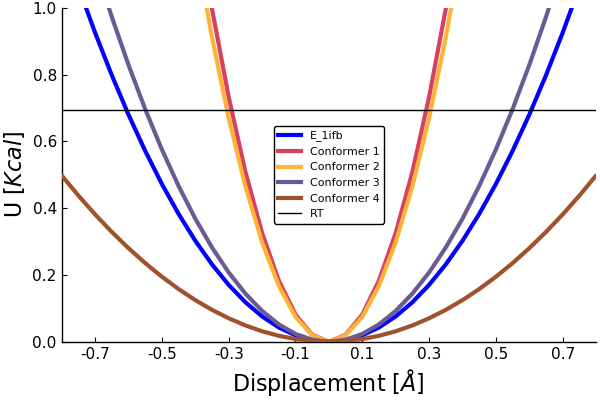

In [98]:
pasos = collect(-.8:.05:.8)
npasos = length(pasos)
RT = 0.693

E_1 = Array{Float64, 1}(undef, npasos)
[ E_1[i] = JUMD.energiaGdte(evals_1, vgv_1, pasos[i]) for i in 1:npasos]

E_2 = Array{Float64, 1}(undef, npasos)
[ E_2[i] = JUMD.energiaGdte(evals_2, vgv_2, pasos[i]) for i in 1:npasos]

E_3 = Array{Float64, 1}(undef, npasos)
[ E_3[i] = JUMD.energiaGdte(evals_3, vgv_3, pasos[i]) for i in 1:npasos]

E_4 = Array{Float64, 1}(undef, npasos)
[ E_4[i] = JUMD.energiaGdte(evals_4, vgv_4, pasos[i]) for i in 1:npasos];


plt_u = plot(pasos, E_1ifb, lab = "E_1ifb",
    xticks = -.7:.2:.7, yticks = 0:.2:1.,
    xlims = (-.8, .8), ylims = (0, 1.),
    guidefont = font(16, "Helvetica"), tickfont = font(11, "Helvetica"),
    yaxis = L"U $[Kcal]$", xaxis = L"Displacement $[\AA]$ ",
    linecolor = Colors.colorant"#0000FF", linewidth = 3,
    grid = false)

plot!(plt_u, pasos, E_1, lab = "Conformer 1",
    linecolor = Colors.colorant"#d64161", linewidth = 3)
plot!(plt_u, pasos, E_2, lab = "Conformer 2",
    linecolor = Colors.colorant"#feb236", linewidth = 3)
plot!(plt_u, pasos, E_3, lab = "Conformer 3",
    linecolor = Colors.colorant"#6b5b95", linewidth = 3)
plot!(plt_u, pasos, E_4, lab = "Conformer 4",
    linecolor = Colors.colorant"#a0522d", linewidth = 3)
hline!(plt_u, [RT], lab = "RT", linecolor = Colors.colorant"black")

# Volúmenes de poblaciones

In [76]:
idx_vol1 = convert(Array{Int64}, readdlm(joinpath(rtdos, string(pdb, "_idx_vol1")))[:, 1])
idx_vol2 = convert(Array{Int64}, readdlm(joinpath(rtdos, string(pdb, "_idx_vol2")))[:, 1])
idx_vol3 = convert(Array{Int64}, readdlm(joinpath(rtdos, string(pdb, "_idx_vol3")))[:, 1])
idx_vol4 = convert(Array{Int64}, readdlm(joinpath(rtdos, string(pdb, "_idx_vol4")))[:, 1])

# Estiro el volumen 
full_trj_vol = Array{Float64}(undef, length(trj_vol)*10)
for i = 1:length(trj_vol)
    k = (i-1) * 10 + 1
    full_trj_vol[k:k+9] =  fill(trj_vol[i], 10)
end

trj_vol1 = full_trj_vol[idx_vol1]
trj_vol2 = full_trj_vol[idx_vol2]
trj_vol3 = full_trj_vol[idx_vol3]
trj_vol4 = full_trj_vol[idx_vol4];

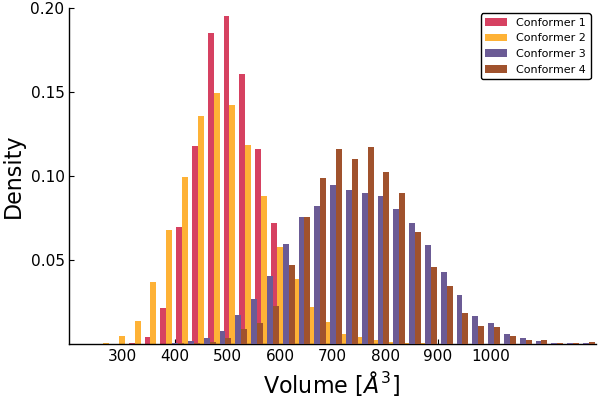

In [82]:
st = 30
bw = 28
fa = .9
bin_range = 200:st:1200
bin_vol = collect(bin_range)

# Histograma ponderado
wgh_vol = fill(1.0, length(idx_vol1))
bin_vol1_1ifb, his_vol1_1ifb = JUMD.weightedHist(trj_vol1, bin_vol, wgh_vol, true, false)

wgh_vol = fill(1.0, length(idx_vol2))
bin_vol2_1ifb, his_vol2_1ifb = JUMD.weightedHist(trj_vol2, bin_vol, wgh_vol, true, false)

wgh_vol = fill(1.0, length(idx_vol3))
bin_vol3_1ifb, his_vol3_1ifb = JUMD.weightedHist(trj_vol3, bin_vol, wgh_vol, true, false)

wgh_vol = fill(1.0, length(idx_vol4))
bin_vol4_1ifb, his_vol4_1ifb = JUMD.weightedHist(trj_vol4, bin_vol, wgh_vol, true, false)

grp = repeat(["Conformer 1", "Conformer 2", "Conformer 3", "Conformer 4"],
    inner = length(bin_vol1_1ifb))
clr = repeat([colorant"#d64161", colorant"#feb236", colorant"#6b5b95", colorant"#a0522d"],
    inner = length(bin_vol1_1ifb))

plt_his_vols = groupedbar(repeat(bin_vol1_1ifb, outer = 4),
    hcat(his_vol1_1ifb, his_vol2_1ifb, his_vol3_1ifb, his_vol4_1ifb),
    group = grp, fillcolor = clr, bar_width = 45,
    xticks = 3E2:100:1E3, yticks = .05:.05:.2,
    xlims = (200, 1200), ylims = (0, .2),
    
    linecolor = false, legend = (.9, .95),
    grid = false, guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = "Density", xaxis = L"Volume $[\AA^3]$ ")

In [83]:
savefig(plt_his_vols, joinpath(rtdos, "papel", "3", string("3_VolHis_", pdb, ".svg")))

In [84]:
hcat([ mean(trj_vol1) ; mean(trj_vol2) ; mean(trj_vol3) ; mean(trj_vol4) ],
    [ std(trj_vol1) ; std(trj_vol2) ; std(trj_vol3) ; std(trj_vol4) ])

4×2 Array{Float64,2}:
 519.04    61.1375
 504.254   83.4161
 742.974  118.312 
 745.832  102.501 

In [85]:
trj_vol1_smooth = [ mean(trj_vol1[i:i+10]) for i = 1:10:length(trj_vol1)-9 ]
trj_vol2_smooth = [ mean(trj_vol2[i:i+10]) for i = 1:10:length(trj_vol2)-9 ]
trj_vol3_smooth = [ mean(trj_vol3[i:i+10]) for i = 1:10:length(trj_vol3)-9 ]
trj_vol4_smooth = [ mean(trj_vol3[i:i+9]) for i = 1:10:length(trj_vol3)-9 ]

idx_vol1_smooth = [ idx_vol1[i] for i = 1:10:length(idx_vol1)-9 ]
idx_vol2_smooth = [ idx_vol2[i] for i = 1:10:length(idx_vol2)-9 ]
idx_vol3_smooth = [ idx_vol3[i] for i = 1:10:length(idx_vol3)-9 ]
idx_vol4_smooth = [ idx_vol4[i] for i = 1:10:length(idx_vol4)-9 ]

grupos = [ fill("Conformer 1", length(idx_vol1_smooth));
    fill("Conformer 2", length(idx_vol2_smooth)); 
    fill("Conformer 3", length(idx_vol3_smooth)); 
    fill("Conformer 4", length(idx_vol4_smooth)) ];

In [86]:
ma = .9
plt_vol_pop = scatter(idx_vol1_smooth, trj_vol1_smooth,  label = "Conformer 1",
    markersize = 2., markeralpha = ma, markerstrokewidth = .1, seriescolor = colorant"#d64161",
    xticks = (1E5:1E5:3E5, ["1", "2", "3"]),
    grid = false, guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = L"Volume $[\AA^{3}]$", xaxis = "Time [μs]")

scatter!(idx_vol2_smooth, trj_vol2_smooth, label = "Conformer 2",
    markersize = 2., markeralpha = ma, markerstrokewidth = .1, seriescolor = colorant"#feb236")

scatter!(idx_vol3_smooth, trj_vol3_smooth, label = "Conformer 3",
    markersize = 2., markeralpha = ma, markerstrokewidth = .1, seriescolor = colorant"#6b5b95")

scatter!(idx_vol4_smooth, trj_vol4_smooth, label = "Conformer 4",
    markersize = 2., markeralpha = ma, markerstrokewidth = .1, seriescolor = colorant"#a0522d");

In [87]:
savefig(plt_vol_pop, joinpath(rtdos, "papel", "3", string("3_Vol_", pdb, ".svg")))

## Métodos de Marcos

In [ ]:
dif = h5read(joinpath(rtdos, string("diff_", pdb, ".h5")), "dif")
norm_dif = mapslices(x -> x ./ norm(x), dif,  dims = 1)
nframes = size(dif)[2]

prj_1_1ifb = Array{Float64, 1}(undef, nframes)
prj_2_1ifb = Array{Float64, 1}(undef, nframes)
prj_3_1ifb = Array{Float64, 1}(undef, nframes)

for i = 1:nframes
    prj_1_1ifb[i] = dot(norm_dif[:, i], modes_1ifb[:, 1])
    prj_2_1ifb[i] = dot(norm_dif[:, i], modes_1ifb[:, 2])
    prj_3_1ifb[i] = dot(norm_dif[:, i], modes_1ifb[:, 3])
end

# Smooth
smooth_prj_1_1ifb = [ mean(prj_1_1ifb[i:i+9]) for i = 1:10:length(prj_1_1ifb)-9 ]
smooth_prj_2_1ifb = [ mean(prj_2_1ifb[i:i+9]) for i = 1:10:length(prj_2_1ifb)-9 ]
smooth_prj_3_1ifb = [ mean(prj_3_1ifb[i:i+9]) for i = 1:10:length(prj_3_1ifb)-9 ];

In [ ]:
### 1
nframes_vol1 = length(idx_vol1)
        
marcos_pnu_vol1 = h5read(joinpath(rtdos, string("marcos_pnu_vol1_", pdb, ".h5")), "pnu")

# Read Frecuencia de apariciónd de c/ modo en los subespacios de pnumber modos
marcos_modos_vol1 = Array{Array{Int64, 1}}(undef, nframes_vol1)
fid = h5open(joinpath(rtdos, string("marcos_modos_vol1_", pdb, ".h5")), "r")
for i = 1:nframes_vol1
    marcos_modos_vol1[i] = read(fid, string("frame_", i)) 
end
close(fid)

flat_marcos_modos_vol1 = collect(Iterators.flatten(marcos_modos_vol1))

### 2
nframes_vol2 = length(idx_vol2)
        
marcos_pnu_vol2 = h5read(joinpath(rtdos, string("marcos_pnu_vol2_", pdb, ".h5")), "pnu")

# Read Frecuencia de apariciónd de c/ modo en los subespacios de pnumber modos
marcos_modos_vol2 = Array{Array{Int64, 1}}(undef, nframes_vol2)
fid = h5open(joinpath(rtdos, string("marcos_modos_vol2_", pdb, ".h5")), "r")
for i = 1:nframes_vol2
    marcos_modos_vol2[i] = read(fid, string("frame_", i)) 
end
close(fid)

flat_marcos_modos_vol2 = collect(Iterators.flatten(marcos_modos_vol2))

### 3
nframes_vol3 = length(idx_vol3)
        
marcos_pnu_vol3 = h5read(joinpath(rtdos, string("marcos_pnu_vol3_", pdb, ".h5")), "pnu")

# Read Frecuencia de apariciónd de c/ modo en los subespacios de pnumber modos
marcos_modos_vol3 = Array{Array{Int64, 1}}(undef, nframes_vol3)
fid = h5open(joinpath(rtdos, string("marcos_modos_vol3_", pdb, ".h5")), "r")
for i = 1:nframes_vol3
    marcos_modos_vol3[i] = read(fid, string("frame_", i)) 
end
close(fid)

flat_marcos_modos_vol3 = collect(Iterators.flatten(marcos_modos_vol3));

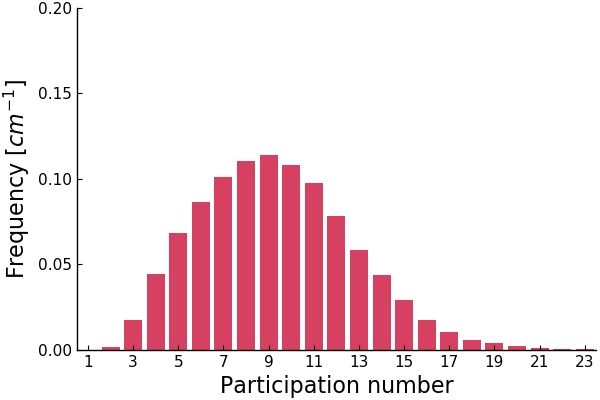

In [28]:
bin_pnu = collect(1:1:25)
wgh_pnu = fill(1.0, length(marcos_pnu_vol1))

# Histograma ponderado
bins_marcos_pnu_vol1, his_marcos_pnu_vol1 = JUMD.WeightedHist(
    marcos_pnu_vol1, bin_pnu, wgh_pnu, true, false);

plt_his_pn_vol1 = bar(bins_marcos_pnu_vol1 .- .5, his_marcos_pnu_vol1,
    ylims = (0, .2), xlims = (.5, 23.5),
    xticks = 1:2:23, yticks = 0:.05:.2,
    guidefont = font(16, "Helvetica"), tickfont = font(11, "Helvetica"),
    fillcolor = Colors.colorant"#d64161", linecolor = false,
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = "Density", xaxis = "Participation number", legend = false)

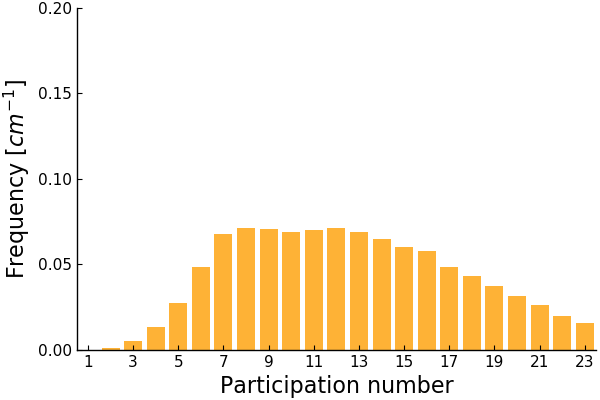

In [29]:
bin_pnu = collect(1:1:25)
wgh_pnu = fill(1.0, length(marcos_pnu_vol2))

# Histograma ponderado
bins_marcos_pnu_vol2, his_marcos_pnu_vol2 = JUMD.WeightedHist(
    marcos_pnu_vol2, bin_pnu, wgh_pnu, true, false);

plt_his_pn_vol2 = bar(bins_marcos_pnu_vol2 .- .5, his_marcos_pnu_vol2,
    ylims = (0, .2), xlims = (.5, 23.5),
    xticks = 1:2:23, yticks = 0:.05:.2,
    guidefont = font(16, "Helvetica"), tickfont = font(11, "Helvetica"),
    fillcolor = Colors.colorant"#feb236", linecolor = false,
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = "Density", xaxis = "Participation number", legend = false)

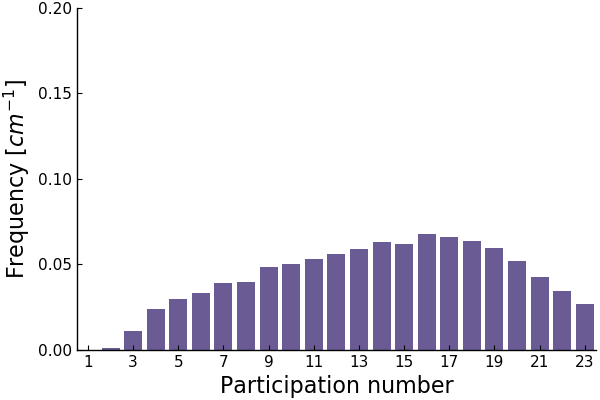

In [30]:
bin_pnu = collect(1:1:25)
wgh_pnu = fill(1.0, length(marcos_pnu_vol3))

# Histograma ponderado
bins_marcos_pnu_vol3, his_marcos_pnu_vol3 = JUMD.WeightedHist(
    marcos_pnu_vol3, bin_pnu, wgh_pnu, true, false);

plt_his_pn_vol3 = bar(bins_marcos_pnu_vol3 .- .5, his_marcos_pnu_vol3,
    ylims = (0, .2), xlims = (.5, 23.5),
    xticks = 1:2:23, yticks = 0:.05:.2,
    guidefont = font(16, "Helvetica"), tickfont = font(11, "Helvetica"),
    fillcolor = Colors.colorant"#6b5b95", linecolor = false,
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = "Density", xaxis = "Participation number", legend = false)

## 3 poblaciones + corrida entera

In [32]:
using AverageShiftedHistograms

In [33]:
# Read Pnumbers
marcos_pnu = h5read(joinpath(rtdos, string("marcos_pnu_", pdb, ".h5")), "pnu")

st = 1
bw = 28
fa = .7
bin_range = 1:st:25
bin_pnu = collect(bin_range)
wgh_pnu = fill(1.0, length(marcos_pnu))
m_ = 2

# Histograma ponderado
bins_marcos_pnu, his_marcos_pnu = JUMD.WeightedHist(marcos_pnu, bin_pnu, wgh_pnu, true, false);

# Suavizado
ash_pnu_vol1 = ash(marcos_pnu_vol1, rng = bin_range, m = m_,
    kernel = AverageShiftedHistograms.Kernels.gaussian)
xy_pnu_vol1 = xy(ash_pnu_vol1);

ash_pnu_vol2 = ash(marcos_pnu_vol2, rng = bin_range, m = m_,
    kernel = AverageShiftedHistograms.Kernels.gaussian)
xy_pnu_vol2 = xy(ash_pnu_vol2);

ash_pnu_vol3 = ash(marcos_pnu_vol3, rng = bin_range, m = m_,
    kernel = AverageShiftedHistograms.Kernels.gaussian)
xy_pnu_vol3 = xy(ash_pnu_vol3);

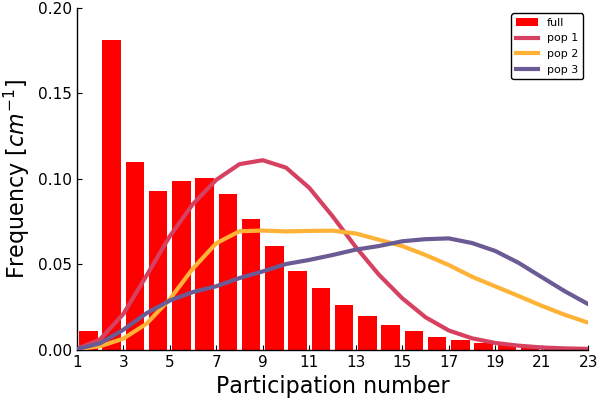

In [34]:
plt_his_pnus = bar(bins_marcos_pnu, his_marcos_pnu,
    label = "full",
    
    xticks = 1:2:23,
    xlims = (1, 23), ylims = (0, .2),
    fillcolor = Colors.colorant"#FF0000", linecolor = false,
    grid = false,  legend = (.9, .95),
    guidefont = font(16, "Arial"), tickfont = font(11, "Arial"),
    yaxis = "Density", xaxis = "Participation number")

plot!(xy_pnu_vol1, linecolor = colorant"#d64161", label = "pop 1", linewidth = 3)
plot!(xy_pnu_vol2, linecolor = colorant"#feb236", label = "pop 2", linewidth = 3)
plot!(xy_pnu_vol3, linecolor = colorant"#6b5b95", label = "pop 3", linewidth = 3)

In [35]:
savefig(plt_his_pnus, joinpath(rtdos, "papel", "2", string("2_HisPn_", pdb, ".svg")))

### RMSD de lig en poblaciones prot. Guardo el frame más similar al avg

# Separo poblaciones